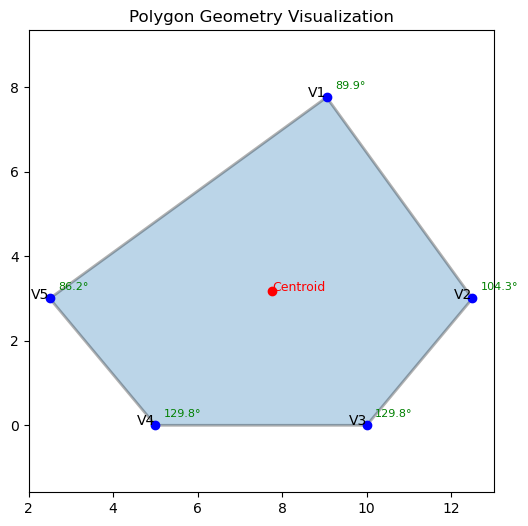

Polygon Area (Shoelace): 46.3
Polygon Area (Shapely): 46.3
Edge Lengths: [5.87878389 3.90512484 5.         3.90512484 8.09691917]
Interior Angles (degrees): [ 89.9276581  104.26020766 129.80557109 129.80557109  86.20099206]
Is Convex: True
Centroid (Vertex Average): [7.81  2.752]
Centroid (True Manual): [7.76558675 3.16766019]
Centroid (Shapely): [7.76558675 3.16766019]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# 1. Polygon vertices
points = np.array([
    [9.05, 7.76],
    [12.5, 3.0],
    [10.0, 0.0],
    [5.0, 0.0],
    [2.5, 3.0]
])

n = len(points)

# 2. Edges as vectors
edges = np.roll(points, -1, axis=0) - points

# 3. Area (shoelace formula)
def shoelace_area(pts):
    x = pts[:, 0]
    y = pts[:, 1]
    return 0.5 * abs(np.dot(x, np.roll(y, -1)) - np.dot(y, np.roll(x, -1)))

area_shoelace = shoelace_area(points)

poly = Polygon(points)
area_shapely = poly.area

# 4. Edge lengths using vector norms
edge_lengths = np.linalg.norm(edges, axis=1)

# 5. Compute Interior angles using dot product formula
def angle_between(v1, v2):
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    cos_theta = np.clip(cos_theta, -1, 1)  # avoid floating errors
    return np.degrees(np.arccos(cos_theta))

angles = []
for i in range(n):
    v1 = points[i-1] - points[i]          # vector from current to previous
    v2 = points[(i+1) % n] - points[i]    # vector from current to next
    angles.append(angle_between(v1, v2))
angles = np.array(angles)

# 6. Convex check - all angles < 180deg
is_convex = np.all(angles < 180)

# 7a. Centroid (simple average of vertices)
centroid_vertex_avg = np.mean(points, axis=0)

# 7b. True polygon centroid (area-weighted, same as Shapely)
def polygon_centroid(pts):
    x = pts[:, 0]
    y = pts[:, 1]
    n = len(pts)
    x_next = np.roll(x, -1)
    y_next = np.roll(y, -1)

    cross = x * y_next - x_next * y
    A = np.sum(cross) / 2.0

    Cx = np.sum((x + x_next) * cross) / (6 * A)
    Cy = np.sum((y + y_next) * cross) / (6 * A)
    return np.array([Cx, Cy])

centroid_true = polygon_centroid(points)
centroid_shapely = np.array(poly.centroid.coords[0])

# 8. Visualization
plt.figure(figsize=(6,6))
plt.fill(points[:,0], points[:,1], alpha=0.3, edgecolor="black", linewidth=2)

# Mark vertices
for i, (x,y) in enumerate(points):
    plt.text(x, y, f"V{i+1}", fontsize=10, ha="right")
    plt.plot(x, y, "bo")

# Mark centroid (true centroid in red)
plt.plot(centroid_true[0], centroid_true[1], "ro")
plt.text(centroid_true[0], centroid_true[1], "Centroid", color="red", fontsize=9)

# Annotate angles
for i, (x,y) in enumerate(points):
    plt.text(x+0.2, y+0.2, f"{angles[i]:.1f}°", fontsize=8, color="green")

plt.title("Polygon Geometry Visualization")
plt.axis("equal")
plt.show()

# 9. Print results
print("Polygon Area (Shoelace):", area_shoelace)
print("Polygon Area (Shapely):", area_shapely)
print("Edge Lengths:", edge_lengths)
print("Interior Angles (degrees):", angles)
print("Is Convex:", is_convex)
print("Centroid (Vertex Average):", centroid_vertex_avg)
print("Centroid (True Manual):", centroid_true)
print("Centroid (Shapely):", centroid_shapely)
